### CUstomer Churn 

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer.the objective is to  build a model that can predictthe Ticket fare basis of the accumulated details like Contract	PaperlessBilling	PaymentMethod	MonthlyCharges	TotalChargesn etc.

### Importing the required liabraries and Loading DataSet

In [2]:
# importing librarires:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

In [4]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())

Size of dataset 
  (7043, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

In [14]:
df.describe(include =np.object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5777-KJIRB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
# AS ONE

df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5777-KJIRB,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


DATASET Summary   
* The Dataset has Size of(7043 X 21) 
* No missing values.


In [19]:
#Listing categorcal or Numeric Coulumn 
cat_col,num_col=[],[]
for i in df:
    if df[i].dtype=='O':
        cat_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_col))
print('>>> Number of Numerical Feature::', len(num_col))

>>> Total Number of Feature:: 21
>>> Number of categorical features:: 18
>>> Number of Numerical Feature:: 3


In [20]:
cat_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [21]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [22]:
# correlatioon check df
df_corr = df.corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


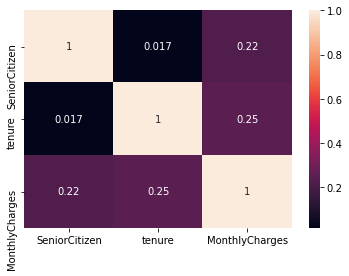

In [24]:
#Visualize 
# plotting the correlation heatmap
sns.heatmap(df_corr,annot=True)
plt.show()

In [ ]:
# Univariate Analysis and Insights 

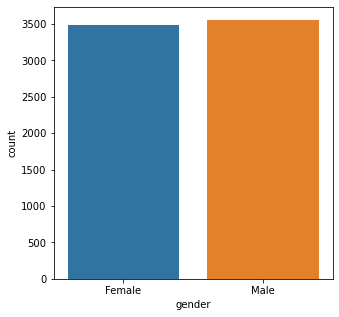

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
# Gender
plt.figure(figsize=(5,5))
sns.countplot(df.gender)
plt.show()
df.gender.value_counts()

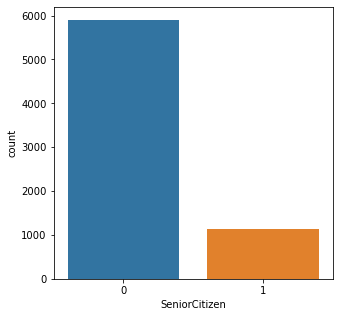

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [28]:
# Senior-Citizen
plt.figure(figsize=(5,5))
sns.countplot(df.SeniorCitizen)
plt.show()
df.SeniorCitizen.value_counts()

In [54]:
len(df[df.SeniorCitizen == 1])/len(df)*100

16.21468124378816

In [40]:
#Less than 20 percent of the customers are Senior citizen 

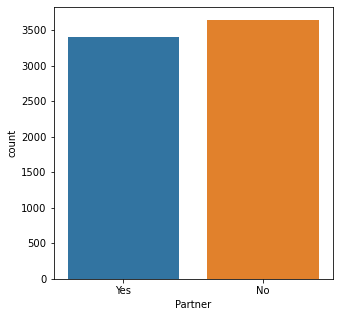

No     3641
Yes    3402
Name: Partner, dtype: int64

In [42]:
# Partner
plt.figure(figsize=(5,5))
sns.countplot(df.Partner)
plt.show()
df.Partner.value_counts()

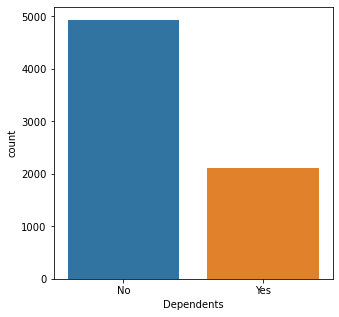

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [43]:
# Dependent
# Partner
plt.figure(figsize=(5,5))
sns.countplot(df.Dependents)
plt.show()
df.Dependents.value_counts()

In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


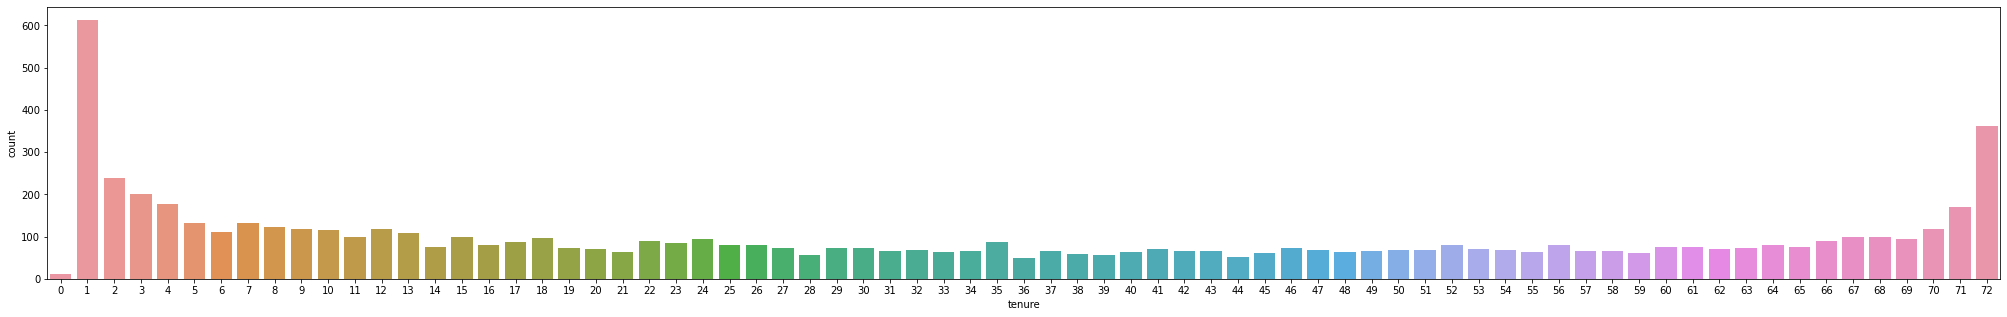

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [47]:
# tenure
plt.figure(figsize=(35,5))
sns.countplot(df.tenure)
plt.show()
df.tenure.value_counts()

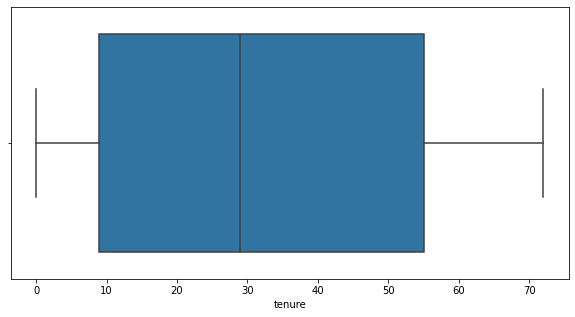

In [48]:
sns.distplot(df.tenure)

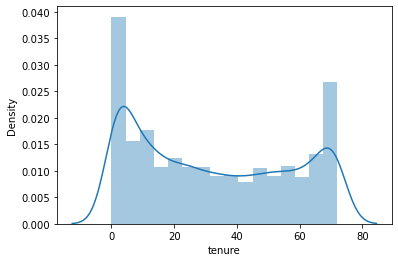

In [49]:
# NO oultiers as such 
#Lets see the distribution of data 

sns.distplot(df.tenure)
plt.show()

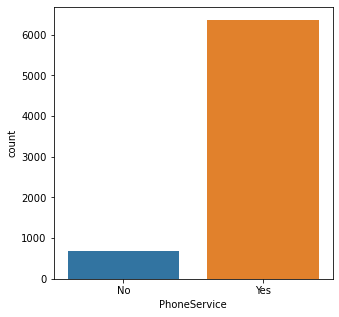

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [55]:
#phone Service 
plt.figure(figsize=(5,5))
sns.countplot(df.PhoneService)
plt.show()
df.PhoneService.value_counts()


In [58]:
len(df[df.PhoneService == 'No'])/len(df)*100

9.683373562402386

In [ ]:
# About 9 percent customer do not have the Phone service 

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


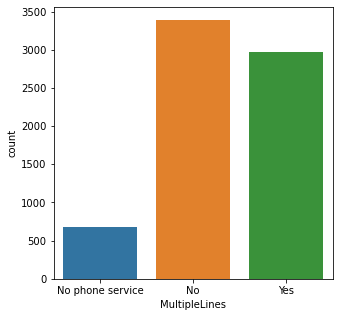

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [60]:
#MultipleLines
plt.figure(figsize=(5,5))
sns.countplot(df.MultipleLines)
plt.show()
df.MultipleLines.value_counts()

In [66]:
df.MultipleLines.value_counts()/len(df)*100


No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

In [68]:
# Almsot same no of ppl prefer Single and Multiple lines 

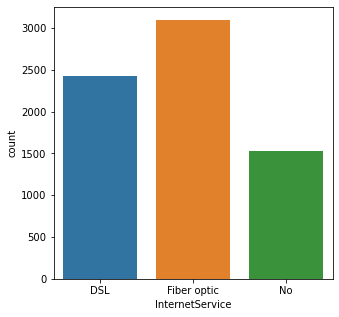

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [69]:
# internet servies
plt.figure(figsize=(5,5))
sns.countplot(df.InternetService)
plt.show()
df.InternetService.value_counts()

In [70]:
df.InternetService.value_counts()/len(df)*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

In [ ]:
# Of the Internet User base  approx 60 percent prefer Fibre optics

In [75]:
# securitys,Backups,Devicesecurity, TechSupportStreaming are only applicable to intenet uses ic 5.65K ppl
#so pushing them in a Interner service group
inet_service = np.array(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'])
inet_service

array(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], dtype='<U16')

OnlineSecurity

 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup

 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection

 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport

 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

StreamingTV

 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 

StreamingMovies

 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 



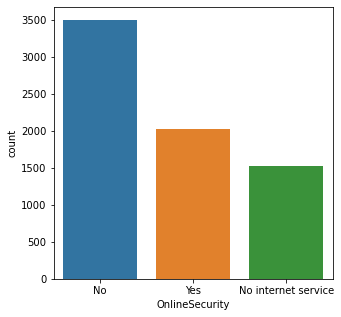

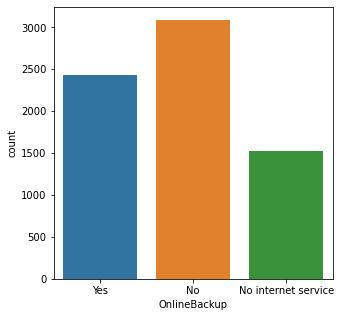

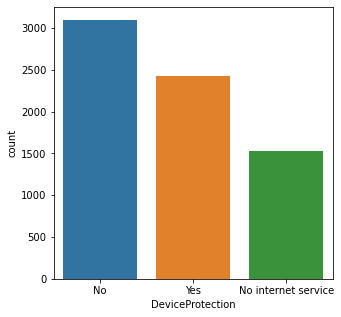

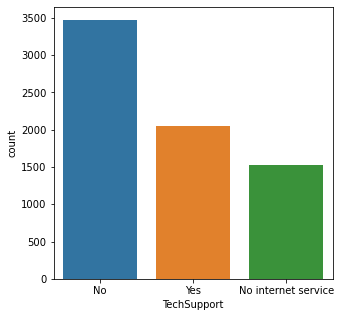

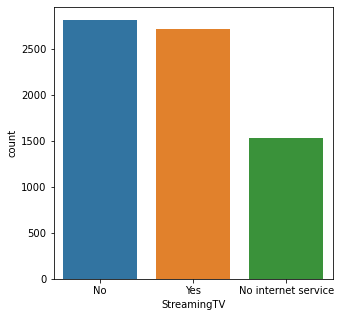

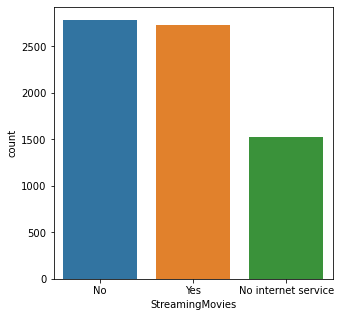

In [87]:
for i in  inet_service:
    plt.figure(figsize=(5,5))
    print(i,)
    print('\n',df[i].value_counts(),'\n')
    sns.countplot(df[i])
    

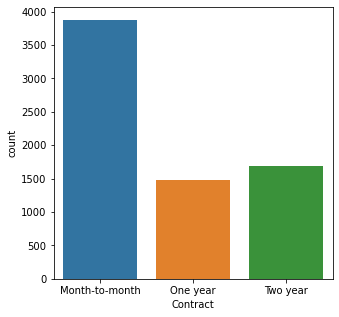

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [89]:
# Contract
plt.figure(figsize=(5,5))
sns.countplot(df.Contract)
plt.show()
df.Contract.value_counts()

In [90]:
df.Contract.value_counts()/len(df)*100

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

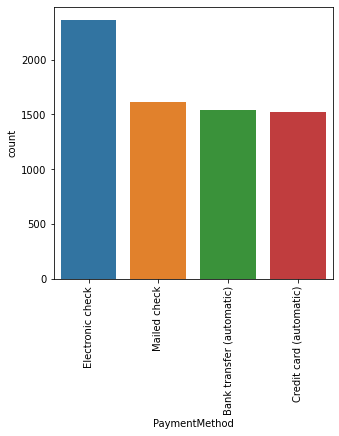

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [93]:
# payments mathod
plt.figure(figsize=(5,5))
sns.countplot(df.PaymentMethod)
plt.xticks(rotation ='90')
plt.show()
df.PaymentMethod.value_counts()

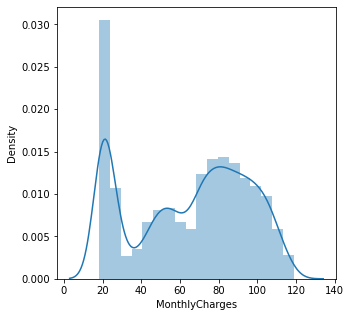

In [94]:
# monthly charges and total monthly charges.
plt.figure(figsize=(5,5))



sns.distplot(df.MonthlyCharges)
plt.show()

ValueError: could not convert string to float: ''

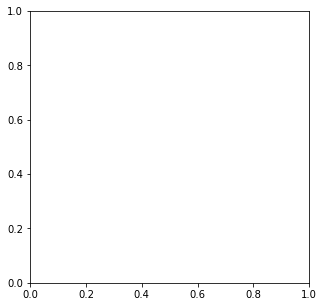

In [96]:

plt.figure(figsize=(5,5))
sns.distplot(df.TotalCharges)
plt.show()

In [97]:
sns.distplot(df.TotalCharges).replace(' ',np.nan,inplace=True)

In [98]:
df.TotalCharges = df.TotalCharges.astype('float')

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

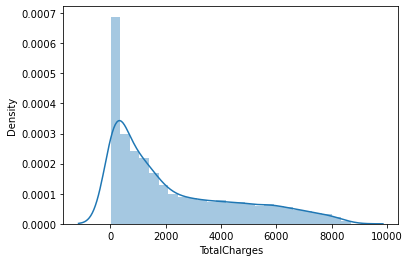

In [99]:
sns.distplot(df.TotalCharges)

In [101]:
df.TotalCharges.isna().sum()

11

In [102]:
## NULL VALUES FOUND 

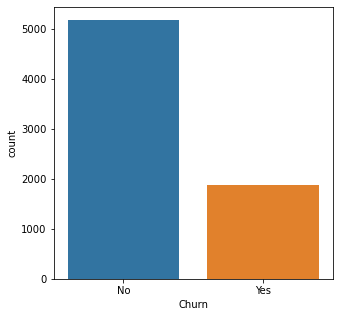

No     5174
Yes    1869
Name: Churn, dtype: int64

In [103]:
# Churn
plt.figure(figsize=(5,5))
sns.countplot(df.Churn)
plt.show()
df.Churn.value_counts()

In [104]:
df.Churn.value_counts()/len(df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [ ]:
# Highly imbalanced 

In [ ]:
 #Multivariate 

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


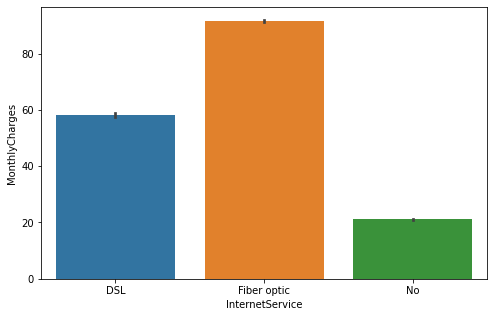

In [109]:
# internet service vs the monthly price
plt.figure(figsize=(8,5))
sns.barplot(df.InternetService,df.MonthlyCharges)
plt.show()

In [ ]:
#Optics have higer Charges

<AxesSubplot:xlabel='tenure', ylabel='Density'>

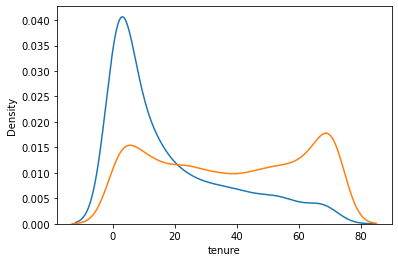

In [110]:
# tenure vs churn
sns.kdeplot(df[df.Churn == 'Yes']['tenure'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['tenure'],label='No')

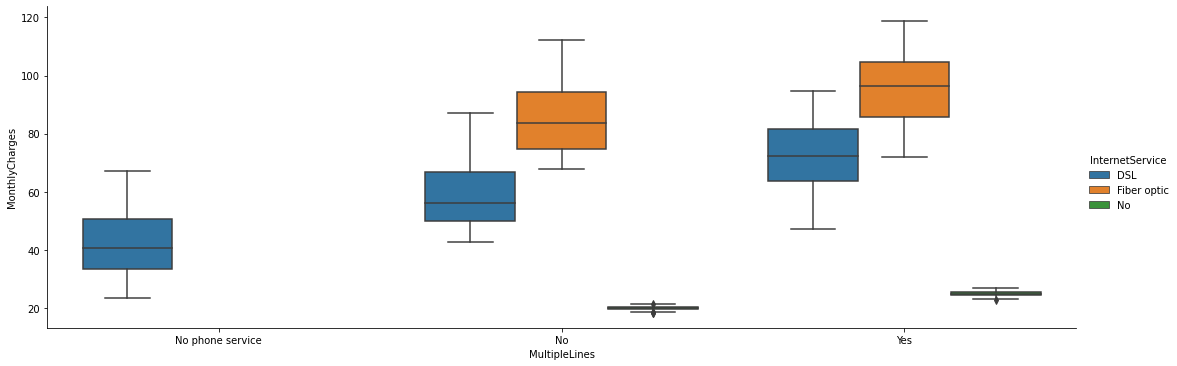

In [111]:
# multiple lines vs monthly bills
sns.catplot(x='MultipleLines',y='MonthlyCharges',data=df,kind='box',hue='InternetService',aspect=3)

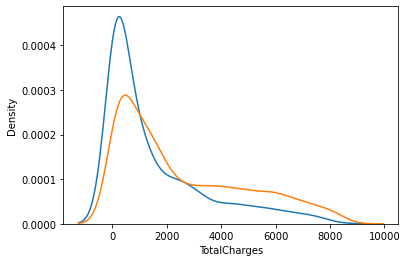

In [113]:
#Churn vS Totalcharges 
sns.kdeplot(df[df.Churn == 'Yes']['TotalCharges'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['TotalCharges'],label='No')
plt.show()

In [117]:
net_services_charges = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MonthlyCharges']

In [118]:
df_sub_services = df[df.InternetService != 'No'][net_services_charges]

In [119]:
df_sub_services.head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,No,Yes,No,No,No,No,29.85
1,Yes,No,Yes,No,No,No,56.95
2,Yes,Yes,No,No,No,No,53.85
3,Yes,No,Yes,Yes,No,No,42.30
4,No,No,No,No,No,No,70.70


In [120]:
df_sub_services = df_sub_services.replace({'Yes':1,'No':0})

In [122]:
df_sub_services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,0,1,0,0,0,0,29.85
1,1,0,1,0,0,0,56.95
2,1,1,0,0,0,0,53.85
3,1,0,1,1,0,0,42.30
4,0,0,0,0,0,0,70.70
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80
7039,0,1,1,0,1,1,103.20
7040,1,0,0,0,0,0,29.60
7041,0,0,0,0,0,0,74.40


In [ ]:
#Charges vary with services but more the no if service more the MOntly charges

In [121]:
## Removing the outliers from the dataset.

In [124]:
df.SeniorCitizen = df.SeniorCitizen.astype(object)
df.SeniorCitizen.dtype

dtype('O')

In [125]:
df.SeniorCitizen.replace({0:'No',1:'Yes'},inplace=True)

In [126]:
#Listing categorcal or Numeric Coulumn 
cat_col,num_col=[],[]
for i in df:
    if df[i].dtype=='O':
        cat_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_col))
print('>>> Number of Numerical Feature::', len(num_col))

>>> Total Number of Feature:: 21
>>> Number of categorical features:: 18
>>> Number of Numerical Feature:: 3


In [127]:
cat_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [128]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [129]:
# creating anothjer dataset to proces the outliers .
df_cleaned = df.copy()

In [131]:
# drop the 11 samples with TotalCharge = np.nan
df_cleaned.dropna(subset=['TotalCharges'],inplace=True)

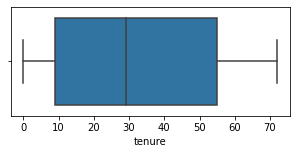

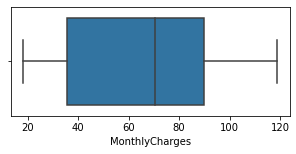

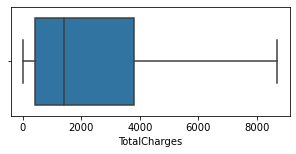

In [136]:
for i in num_col:
    plt.figure(figsize=(5,2))
    sns.boxplot(df[i])

*  WOW no outliers
 ### Lets check skewness

In [137]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [139]:
# Fixing via Log Transofrmstion 
np.log1p(df_cleaned[num_col]).skew()

tenure           -0.774128
MonthlyCharges   -0.720968
TotalCharges     -0.743089
dtype: float64

In [140]:
# Fixing via sqrt Transofrmstion 
np.sqrt(df_cleaned[num_col]).skew()

tenure           -0.234197
MonthlyCharges   -0.486283
TotalCharges      0.308926
dtype: float64

In [141]:
# Fixing via cube root Transofrmstion 
np.cbrt(df_cleaned[num_col]).skew()

tenure           -0.446701
MonthlyCharges   -0.570884
TotalCharges      0.012819
dtype: float64

In [142]:
# SQUARE ROOT TRANSFORMATION GAVE BEST RESULTS 
df_cleaned[num_col] = np.sqrt(df_cleaned[num_col])

In [143]:
# ENCODING 
from sklearn.preprocessing import LabelEncoder

lab_enc =LabelEncoder()


In [149]:
for i in cat_col:
    df_cleaned[i]=lab_enc.fit_transform(df_cleaned[i])

In [150]:
df_cleaned.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4476,5262,0,0,0,0,1.000000,1,0,2,1,...,1,1,1,1,0,0,3,4.571652,4.571652,1
2877,194,0,0,1,1,7.810250,1,2,1,0,...,0,0,2,2,0,1,2,9.957409,77.524512,1
30,2694,0,1,1,0,8.426150,1,2,1,2,...,2,2,0,0,2,1,1,9.815804,82.261473,0
5962,2696,1,0,1,0,4.000000,1,0,1,2,...,0,0,0,0,0,0,0,8.986100,36.349691,0
4799,2920,0,0,1,1,3.162278,1,0,2,1,...,1,1,1,1,0,1,0,4.449719,14.026760,0
6212,4622,1,0,0,0,3.872983,0,1,0,0,...,2,0,2,2,1,0,2,7.123903,26.233566,0
2368,4710,0,0,1,0,8.485281,1,2,1,2,...,2,2,2,2,2,1,1,10.823585,92.355292,0
1363,2146,0,0,1,0,8.485281,1,2,0,2,...,2,2,2,2,2,0,0,9.591663,80.463656,0
1298,4238,0,0,1,1,4.898979,0,1,0,2,...,2,0,2,2,1,0,2,7.589466,36.983104,0
6700,5754,1,0,1,0,8.485281,1,2,1,0,...,2,0,2,2,2,1,0,10.310189,86.979020,0


### Building the model

### X and y split

In [152]:
#X and y split
X = df_cleaned.drop('Churn',1)
y = df_cleaned['Churn']

In [153]:
#Train and TRAIN_TEST split
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [157]:
# checking the shape
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_test.shape)
print ('YTRAIN \n',y_test.shape)

XTRAIN 
 (4922, 20)
YTRAIN 
 (4922,)
XTEST 
 (2110, 20)
YTRAIN 
 (2110,)


In [159]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier



# Evaluation metrices  
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [167]:
#Reusable Function 
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('Classification Report:',classification_report(y_test,model.predict(X_test)))


In [168]:
# MOdel1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.809833401056481
Test_Acc: 0.7943127962085308
Recall: 0.7943127962085308
Precision: 0.7943127962085308
F1: 0.7943127962085308
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [169]:
#Model2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.7342543681430312
Test_Acc: 0.7341232227488151
Recall: 0.7341232227488151
Precision: 0.7341232227488151
F1: 0.7341232227488151
Classification Report:               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



In [170]:
#Model3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.7891101178382771
Test_Acc: 0.7085308056872038
Recall: 0.7085308056872038
Precision: 0.7085308056872038
F1: 0.7085308056872038
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.89      0.82      1549
           1       0.40      0.20      0.26       561

    accuracy                           0.71      2110
   macro avg       0.58      0.55      0.54      2110
weighted avg       0.66      0.71      0.67      2110



In [171]:
#Model4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 1.0
Test_Acc: 0.7919431279620853
Recall: 0.7919431279620853
Precision: 0.7919431279620853
F1: 0.7919431279620853
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [172]:
#Model5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8327915481511581
Test_Acc: 0.795734597156398
Recall: 0.795734597156398
Precision: 0.795734597156398
F1: 0.795734597156398
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [173]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150)]
model_names = 'Log_reg SVC KNN Random_forest DTC Gradient_boost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    models_df

Log_reg
SVC
KNN
Random_forest
DTC
Gradient_boost


In [174]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Log_reg,0.809833,0.794313,0.794313,0.794313,0.794313,0.801913
1,SVC,0.734254,0.734123,0.734123,0.734123,0.734123,0.734254
2,KNN,0.789110,0.708531,0.708531,0.708531,0.708531,0.702153
3,Random_forest,1.000000,0.731754,0.731754,0.731754,0.731754,0.722061
4,DTC,1.000000,0.792417,0.792417,0.792417,0.792417,0.792973
5,Gradient_boost,0.843153,0.794313,0.794313,0.794313,0.794313,0.798662


### BEST MODEL after considering Cross Validation will be Logistic Regression   as the difference for it model  is lower amongst all

In [184]:
### HyperParaneter Tuning for Logistic Regression 
from sklearn.model_selection import GridSearchCV
parameters ={'n_jobs':[1,'None'],
            'class_weight':['dict','balanced']}

In [185]:
GSV = GridSearchCV(LogisticRegression(),parameters,cv=2)
GSV.fit(X_train,y_train)


GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'n_jobs': [1, 'None']})

### BEST PARAMS 

In [186]:
GSV.best_params_

{'class_weight': 'dict', 'n_jobs': 1}

In [ ]:
## RESEDIGING THE MODEL WITH RECOMENDED PARAMETERS by GridSearchCV

In [188]:
best_model = LogisticRegression(class_weight= 'dict', n_jobs=1)

In [189]:
best_model.fit(X_train,y_train)

LogisticRegression(class_weight='dict', n_jobs=1)

In [190]:
y_preds = best_model.predict(X_test)

In [191]:
train_n_ret_scores(LogisticRegression(class_weight= 'dict', n_jobs=1))

Train_Acc: 0.809833401056481
Test_Acc: 0.7943127962085308
Recall: 0.7943127962085308
Precision: 0.7943127962085308
F1: 0.7943127962085308
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [192]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



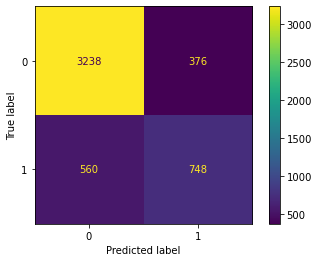

In [193]:
plot_confusion_matrix(best_model,X_train,y_train)

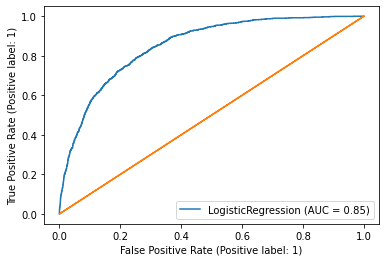

In [195]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)
plt.show()

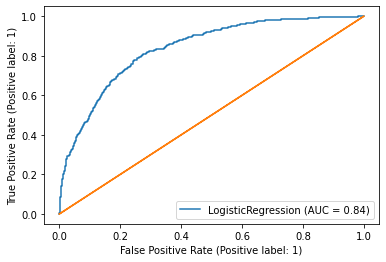

In [196]:
plot_roc_curve(best_model,X_test,y_test)
plt.plot(y_test,y_test)
plt.show()

### Saving Model

In [197]:
#Saving Model 
import joblib
joblib.dump(best_model,'Customer_churn.pk1')


['Customer_churn.pk1']